#모수 확률밀도 추정(Parametric Density Estimation) : 클래스별 


*   확률 모델 가정 후 값(파라미터) 추정 : 평균이나 분산 등
*   단점 : 추정한 밀도함수와 모집단 밀도 함수 차이 시 의미 없음



## 데이터가 가우시안 분포로 가정
$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

In [28]:
import numpy as np
np.random.seed(0)

row_count = 100

### 단변량 분포

In [29]:
x = np.linspace(-8, 8, row_count)

mu_1, sigma_1 = 0.0, 1.0
mu_2, sigma_2 = 1.5, 1.5
mu_3, sigma_3 = 3.0, 2.0

y_1 = (1 / np.sqrt(2 * np.pi * sigma_1**2)) * np.exp(-(x-mu_1)**2 / (2 * sigma_1**2))
y_2 = (1 / np.sqrt(2 * np.pi * sigma_2**2)) * np.exp(-(x-mu_2)**2 / (2 * sigma_2**2))
y_3 = (1 / np.sqrt(2 * np.pi * sigma_3**2)) * np.exp(-(x-mu_3)**2 / (2 * sigma_3**2))
print(y_1.var(),  y_2.var(), y_3.var()) # 분산
print(y_1.std(),  y_2.std(), y_3.std()) # 표준편차
type(x), x.shape, y_1.shape, x.mean(),#x, y_1 

0.013626099616008715 0.007807938064356931 0.0049395649799881735
0.11673088544172325 0.08836253767494985 0.07028203881496448


(numpy.ndarray, (100,), (100,), 6.572520305780927e-16)

In [30]:
import matplotlib.pyplot as plt

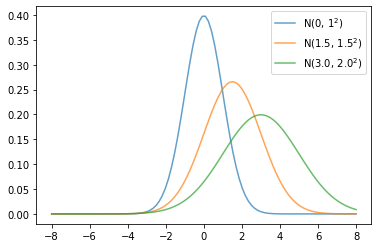

In [31]:
plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x, y_2, alpha=0.7, label=r'N(1.5, $1.5^2$)')
plt.plot(x, y_3, alpha=0.7, label='N(3.0, $2.0^2$)')
plt.legend(ncol=1)

In [32]:
x_rand = np.sort(np.random.randn(row_count))  # 그래프 분포 점 표시 위해 정렬
x_rand.shape, x_rand.mean(), x_rand.std()# x_rand

((100,), 0.059808015534484955, 1.0078822447165796)

In [33]:
mu_rand, sigma_rand = -0.08, 0.96   # 비교 위해 평균과 분산 조정
y_rand = (1 / np.sqrt(2 * np.pi * sigma_rand**2)) * np.exp(-(x_rand-mu_rand)**2 / (2 * sigma_rand**2))

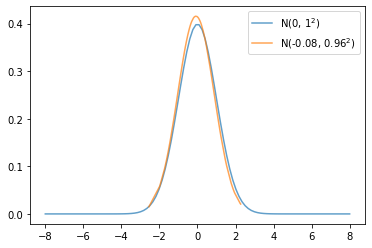

In [34]:
x_like = np.full_like(x, fill_value=-0.001)  
# plt.plot(x, x_like, 'o', color='blue', ms=1, ls='None', label=r'P N(0, $1^2$)') # 수직선 상에 표시

plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x_rand, y_rand, alpha=0.7, label=r'N(-0.08, $0.96^2$)')
plt.legend(ncol=1)

###다변량 분포

In [35]:
normal_rand = np.random.randn(row_count, 2)
# normal_rand, 
normal_rand.shape, type(normal_rand)

((100, 2), numpy.ndarray)

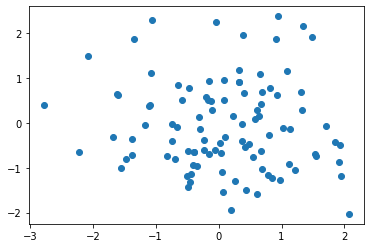

In [36]:
plt.plot(normal_rand[:,1], normal_rand[:,0],marker='o', linestyle='None')

$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

In [37]:
mu_rand, sigma_rand = np.array([0,0]), np.eye(1, dtype=int) # 정규 평균과 공분산 행렬 정의
mu_rand, sigma_rand

(array([0, 0]), array([[1]]))

In [38]:
np.invert(sigma_rand), sigma_rand

(array([[-2]]), array([[1]]))

In [39]:
# normal_rand[:,1].shape
(normal_rand-mu_rand).shape, (normal_rand[1]-mu_rand).shape

((100, 2), (2,))

In [ ]:
X_meshgrid, Y_meshgrid = np.meshgrid(normal_rand[:,0], normal_rand[:,1])
X_meshgrid.shape, Y_meshgrid.shape, X_meshgrid[0,:]

In [41]:
# XY = X_meshgrid, Y_meshgrid
# XY.shape

In [ ]:
# 1/np.sqrt(2*np.pi*np.linalg.det(sigma_rand))*np.exp(-1/2*(normal_rand-mu_rand)*np.invert(sigma_rand)*(normal_rand-mu_rand))

## 모수추정 시 단점 : 분포 오류 시 좋은 추정 함수 얻기 어려움

In [50]:
x_list = np.random.randint(-8,8,5)

In [51]:
pdf_list = np.random.choice(x_list, p=[0.05, 0.3, 0.2, 0.05, 0.4], size=(100)) # PDF(Probability Density Function)-적분
pdf_list

array([ 2, -6, -7, -6, -6,  2, -6, -7, -6,  2, -6,  2, -6,  2, -6, -5, -5,
       -5, -5, -6, -6, -6, -6, -5,  2,  2, -6, -6,  2, -5, -7,  1, -5, -5,
        2, -5, -6, -7, -6, -6,  2,  2, -5, -6, -5,  2, -5, -6, -6, -6, -6,
       -5, -6, -6, -7, -6, -5, -6, -5, -6, -5, -6, -5, -6, -6,  2, -5, -5,
       -6, -5, -5,  2, -6,  2, -7,  2,  2,  2,  2,  1, -6,  1,  1,  2,  1,
        2,  2, -6, -5, -6, -6, -5, -5, -5,  2, -5,  2, -6, -5,  2])

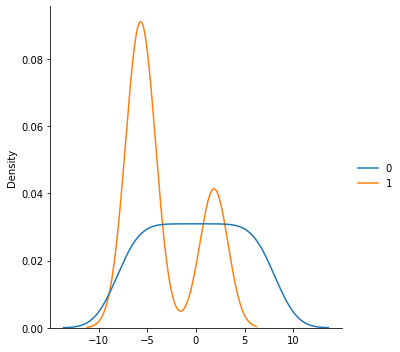

In [55]:
import seaborn as sns
sns.displot([x,pdf_list], kind='kde')    # kdep은 커널 밀도 추정(kernal density estimation)
# sns.displot(, kind='kde')
plt.show()